# Time delay

Mikhail Pak, 2017

In [1]:
from controlboros import TimeDelay
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In this notebook, we shall show how to use a `TimeDelay` system. We simulate from 0 to 2 s with a sample time of 10 ms. Our time delay will be 0.5 s, i.e. 50 samples.

In [2]:
t_begin, t_end = 0.0, 2.0
dt = 10.0e-3

We create the time delay model:

In [3]:
td = TimeDelay(50)

We initalise variables and arrays for our signals:

In [4]:
t = np.arange(t_begin, t_end, dt)

inp = np.sin(np.pi*t)  # Input signal
out = np.zeros((len(t),))  # Array for the output

We're ready to run the main loop:

In [5]:
# Reset the inital state of the time delay,
# helpful if you run this cell multiple times!
td.set_state_to_zero()

for i in range(len(t)):
    out[i] = td.push_stateful(inp[[i]])

Plot and compare results:

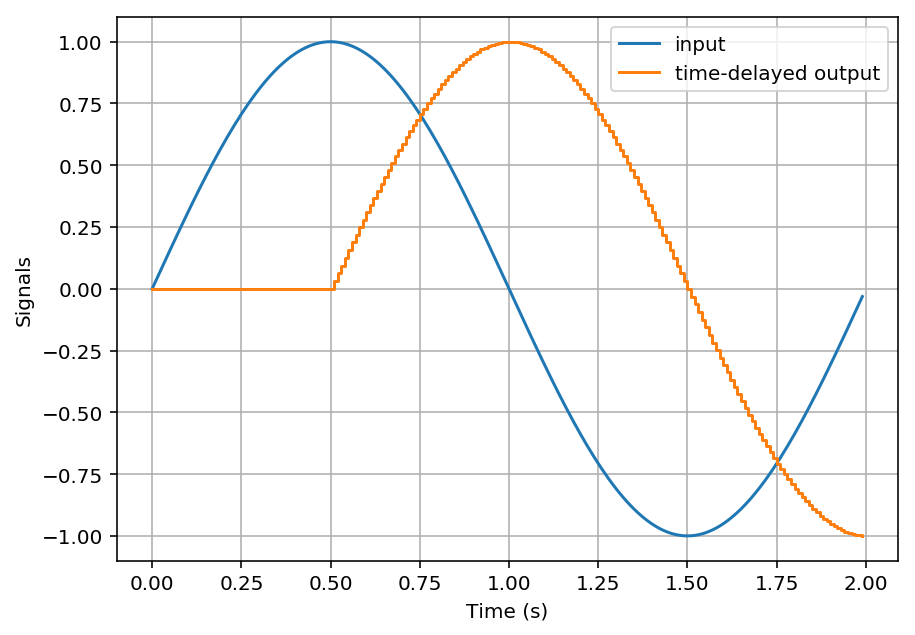

In [6]:
plt.figure(figsize=(7, 5))
plt.plot(t, inp)
plt.step(t, out, where="post")
plt.xlabel("Time (s)")
plt.ylabel("Signals")
plt.legend(["input", "time-delayed output"])
plt.grid()
plt.show()